# Striped Skunk
Author: N. Tarr

### Fill out the cell below

In [1]:
eval_id = '2020v1'
notebook_name = "mSTSKx_2020v1.ipynb"
summary_name = 'striskunk' # a short, memorable name to use for file names etc.

# Paths to occurrence record databases to use (from wildlife-wrangler).  Put paths as items in a tuple.
recent_dbs = ('P:/Proj3/USGap/Vert/USranges/2020v1/OccRecords/mstskx0Gr25Gf10.sqlite',)
historic_dbs = ('P:/Proj3/USGap/Vert/USranges/2020v1/OccRecords/mstskx0Gr26Gf10.sqlite',)

codeDir = 'T:/code/GAP-ranges/'
inDir = 'P:/Proj3/USGap/Vert/USRanges/2020v1/2001Ranges/'
outDir = 'P:/Proj3/USGap/Vert/USRanges/2020v1/Results/'
parameters_db = 'P:/Proj3/USGap/Vert/DBase/ranges-records.sqlite'
shucs_loc = 'P:/Proj3/USGap/Vert/Model/data/HucRng/Hucs'

There is a bug with mpl_toolkits, the following code is a temp fix, hopefully. https://stackoverflow.com/questions/52911232/basemap-library-using-anaconda-jupyter-notebooks-keyerror-proj-lib/54087410#54087410

In [2]:
import os
os.environ['PROJ_LIB'] = r'c:\Users\nmtarr\AppData\Local\Continuum\miniconda3\envs\wrangler\Library\share'

### General Setup  -  Nothing to fill out here.

In [3]:
%matplotlib inline
import sqlite3
import pprint
import pandas as pd
pd.set_option('display.width', 600)
pd.set_option('display.max_colwidth', 80)
pd.set_option('display.max_rows', 100)
from IPython.display import Image
import os
os.chdir(codeDir)
import range_functions as functions
os.chdir(outDir)
import matplotlib.pyplot as plt
os.environ['PROJ_LIB'] = r'c:\Users\nmtarr\AppData\Local\Continuum\miniconda3\envs\wrangler\Library\share'
from datetime import datetime
t1 = datetime.now()
connName = sqlite3.connect(recent_dbs[0])
gap_id = connName.execute("""SELECT value FROM species_concept WHERE attribute = "gap_id";""").fetchone()[0]
common_name = connName.execute("""SELECT value FROM species_concept WHERE attribute = "common_name";""").fetchone()[0]
sci_name = connName.execute("""SELECT value FROM species_concept WHERE attribute = "scientific_name";""").fetchone()[0]
del connName
eval_db = outDir + gap_id + eval_id + '.sqlite'

## Range Compilation Parameters

Parameters for range map compilation need to be set and justified in the cells within this section.  Values that are entered here will be used to update cells within the 'evaluations' table stored in ranges-records.sqlite. However, note that the decisions about what parameter values to use are primarily documented here, not in the evaluations database.

Also, note that the evaluation ID and species' GAP code are set in the cell above, not below.  This way, sets of evaluation parameters can be documented as unique entities in a database (i.e, range-records.sqlite).  Each evaluation can be given a unique id that can be used in documentation, file naming, and for the names of the columns that will be added to the GAP range table to record the results of the evaluation.

### Filter Sets
The cell below pulls this information from occurrence record databases that were named above.  

Notes on why the particular filter sets were used:

In [4]:
occ_dbs = recent_dbs + historic_dbs
filter_sets, filters_request, filters_post = functions.NB_get_filter_sets(occ_dbs)
print(filter_sets)

Gr26, Gf10, Gr25


### Years
Justification: All available records with somewhat dependable locational information are desired.  GPS became decent around 2000.

In [5]:
start_year = 2000
end_year = 2020
years = str(list(range(start_year, end_year + 1, 1)))[1:-1]

### Months
Justification: Skunks are not migratory so all months are of interest.

In [6]:
months = "1,2,3,4,5,6,7,8,9,10,11,12"

### Evaluation Method
Justification: The restrictive nature of "proportion" is a good fit for the demonstration of the framework.

In [7]:
method = "proportion"

#### Error Tolerance
Justification: 20% is a rather modest requirement.  No indication that this species requires anything addressed with this parameter.

In [8]:
error_tolerance = 20

### Credits

In [9]:
creator = "Nathan Tarr"
date = datetime.now()

### Justification

In [10]:
justification = "See " + notebook_name

### Notes

In [11]:
notes = """"""

### Write to evaluations.sqlite

In [12]:
connjup = sqlite3.connect(parameters_db)
cursorjup = connjup.cursor()
# Make a row for species-evaluation
sqlrow = """INSERT OR IGNORE INTO evaluations ("evaluation_id", "species_id") VALUES (?, ?);"""
cursorjup.execute(sqlrow, [eval_id, gap_id])
# Filter sets
sqlfilters = """UPDATE evaluations SET filter_sets=? WHERE evaluation_id=? AND species_id=?;"""
cursorjup.execute(sqlfilters, [filter_sets, eval_id, gap_id])
# Years
sqlyear = """UPDATE evaluations SET years=? WHERE evaluation_id=? AND species_id=?;"""
cursorjup.execute(sqlyear, [years, eval_id, gap_id])
# Months
sqlmonths = """UPDATE evaluations SET months=? WHERE evaluation_id=? AND species_id=?;"""
cursorjup.execute(sqlmonths, [months, eval_id, gap_id])
# Evaluation Method
sqlmethod = """UPDATE evaluations SET method=? WHERE evaluation_id=? AND species_id=?"""
cursorjup.execute(sqlmethod, [method, eval_id, gap_id])
# Error Tolerance
sqltolerance = """UPDATE evaluations SET error_tolerance=? WHERE evaluation_id=? AND species_id=?"""
cursorjup.execute(sqltolerance, [error_tolerance, eval_id, gap_id])
# Justification
sqljust = """UPDATE evaluations SET justification=? WHERE evaluation_id=? AND species_id=?"""
cursorjup.execute(sqljust, [justification, eval_id, gap_id])
# Credits
sqlcreator = """UPDATE evaluations SET creator=? WHERE evaluation_id=? AND species_id=?"""
cursorjup.execute(sqlcreator, [creator, eval_id, gap_id])
# Notes
sqlnotes = """UPDATE evaluations SET notes=? WHERE evaluation_id=? AND species_id=?"""
cursorjup.execute(sqlnotes, [notes, eval_id, gap_id])
sqldate= """UPDATE evaluations SET date=? WHERE evaluation_id=? AND species_id=?"""
cursorjup.execute(sqldate, [date, eval_id, gap_id])
connjup.commit()

### Evaluation Parameters
Display the record that was just written.

In [13]:
df1 = pd.read_sql_query(sql="SELECT * FROM evaluations WHERE evaluation_id='{0}' AND species_id='{1}'".format(eval_id, gap_id), con=connjup)
print(df1.loc[0])

evaluation_id                                                                               2020v1
species_id                                                                                  mstskx
years              2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012...
months                                                                  1,2,3,4,5,6,7,8,9,10,11,12
min_count                                                                                     None
error_tolerance                                                                                 20
method                                                                                  proportion
filter_sets                                                                       Gr26, Gf10, Gr25
justification                                                              See mSTSKx_2020v1.ipynb
creator                                                                                Nathan Tarr
date      

### Filter Set Info

In [14]:
for db in occ_dbs:
    filters2 = filters_request + filters_post
    connection = sqlite3.connect(db)
    for f in filters2:
        try:
            set_info = pd.read_sql(sql="""SELECT * FROM {0};""".format(f), con=connection)
            set_info = set_info.T.iloc[1:]
            set_info.rename({'0': ''}, inplace=True, axis=1)
            print(set_info)
            filters2.remove(f)
        except:
            pass
    del connection

                                                                                        0
request_id                                                                           Gr25
source                                                                               GBIF
lat_range                                                                            None
lon_range                                                                            None
years_range                                                                     2016,2020
months_range                                                                         1,12
geoissue                                                                            False
coordinate                                                                           True
country                                                                                US
geometry                                                                             None
creator   

# Occurrence Record Retrieval and Display
This repo is dependent upon the wildlife-wrangler repo because occurrence data is retrieved here from sqlite occurrence databases generated with it.  In this section, a connection is established and records are filtered according to the evaluation parameters.  The occurrence record databases were themselves created with filters, so you have to be mindful of how parameters set here compare to ones set there. For example, dates of records included will be determined by whichever process had a more restrictive date range. 

The first step in using occurrence records to evaluate GAP range is to build a database to hold the GAP 12 digit HUCs, range for the species, and suitable occurrence records.  The database is also suitable for performing the necessary spatial queries.  The GAP range is retrieved from ScienceBase and the HUCs would be too if they were available as a shapefile.  

In [15]:
gap_range = functions.download_GAP_range_CONUS2001v1(gap_id, inDir)
functions.make_evaluation_db(eval_db=eval_db, gap_id=gap_id, shucLoc=shucs_loc, inDir=inDir, outDir=outDir)

downloading https://www.sciencebase.gov/catalog/file/get/59f5e2ace4b063d5d307dfed?f=__disk__ee%2F43%2Fed%2Fee43ed864ccac823f34aa7bb87de14c3c8d573e5 to P:/Proj3/USGap/Vert/USRanges/2020v1/2001Ranges/mSTSKx_CONUS_Range_2001v1.zip
downloading https://www.sciencebase.gov/catalog/file/get/59f5e2ace4b063d5d307dfed?f=__disk__e2%2F23%2Ff0%2Fe223f046b842299cda4f945ee71fe22a18d29cee to P:/Proj3/USGap/Vert/USRanges/2020v1/2001Ranges/mSTSKx_CONUS_Range_2001v1.xml


Copy records to the evaluation database, filtering out records from months or years that aren't wanted.

In [16]:
years = tuple([x.strip() for x in years.split(',')])
months = tuple([x.strip().zfill(2) for x in months.split(',')])
functions.NB_insert_records(years, months, occ_dbs, summary_name, outDir, eval_db)

P:/Proj3/USGap/Vert/USranges/2020v1/OccRecords/mstskx0Gr25Gf10.sqlite
P:/Proj3/USGap/Vert/USranges/2020v1/OccRecords/mstskx0Gr26Gf10.sqlite


### Display Occurrence Points and GAP Range Map

Display occurrence records over GAP range

T:\code\GAP-ranges\range_functions.py:207: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  map = Basemap(projection='aea', resolution='l', lon_0=-95.5, lat_0=39.0, height=3200000, width=5000000)
T:\code\GAP-ranges\range_functions.py:209: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  map.drawstates(color='grey')
T:\code\GAP-ranges\range_functions.py:210: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  map.drawcountries(color='grey')
T:\code\GAP-ranges\range_functions.py:229: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  drawbounds=mapfile['drawbounds'])
T:\code\GAP-ranges\range_functions.py:221: Matplotlib

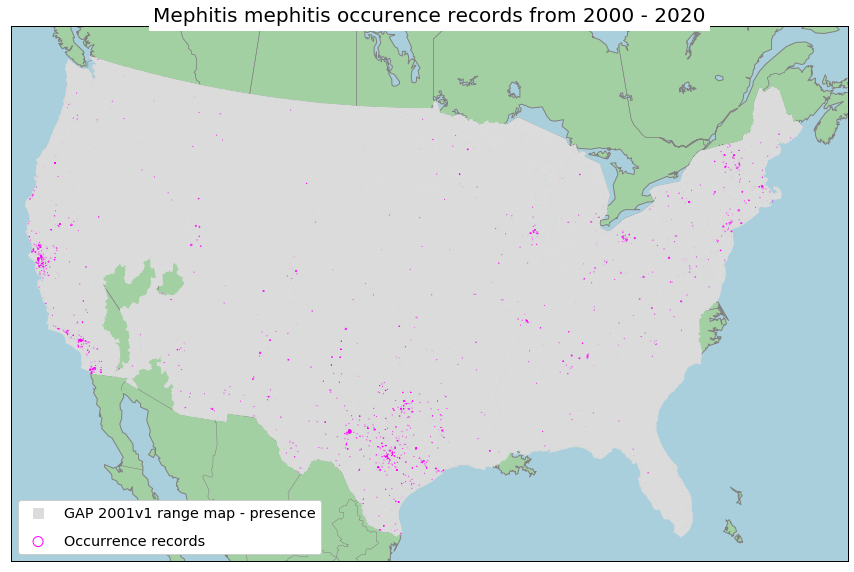

In [17]:
gap_range2 = "{0}{1}_presence2001_4326".format(outDir, gap_id)

shp1 = {'file': gap_range2, 'column': None, 'alias': 'GAP 2001v1 range map - presence',
        'drawbounds': False, 'linewidth': .5, 'linecolor': 'gainsboro',
        'fillcolor': 'gainsboro', 'marker':'s'}

shp2 = {'file': '{0}{1}_circles'.format(outDir, summary_name), 'column': None,
        'alias': 'Occurrence records', 'drawbounds': True, 'linewidth': .75, 'linecolor': 'magenta',
        'fillcolor': None, 'marker':'o'}

# Display occurrence polygons
title="{1} occurence records from {0}".format(years[0] + " - " + years[-1], sci_name)
functions.MapShapefilePolygons(map_these=[shp1, shp2], title=title)

# Compile the GAP 2020v1 range map

In [18]:
functions.compile_GAP_presence(eval_id=eval_id, gap_id=gap_id, eval_db=eval_db, cutoff_year=2015, parameters_db=parameters_db,
                         outDir=outDir, codeDir=codeDir)

Added columns: 0:00:02.181263
Isolated recent records: 0:00:01.655270
Isolated historical records: 0:00:00.796059
Found hucs that intersect a historical occurrence: 0:31:28.238173
Found hucs that intersect a recent occurrence: 1:56:33.603496
Determined which records overlap enough: 0:00:01.622620
Calculated total weight of evidence for each huc : 0:09:55.610497
Added rows for hucs with enough weight but not in GAP range : 0:00:01.325913
Filled out documented presence columns : 0:00:03.320549
Determined 2020v1 range presence value : 0:05:09.136764
Determined age of last occurrence : 0:05:58.462095
Exported shapefile : 0:02:16.941036


# Results

## Newly Compiled Presence Map

### Status definitions
__Confirmed present__ - The species' presence is documented with sufficient data from the past 5 years.

__Likely present__ - There is strong evidence to suggest the species' presence, but presence is not documented.

__Suspected present__ - There is a compelling reason to believe that the species may be present.

__Suspected absent__ - There is a compelling reason to believe that the species is absent.

__Likely absent__ - There is strong evidence to suggest the species' absence.

__NULL/NoData__ - There is no compelling reason to suspect that the species is present, but no explicit evidence of absence.

T:\code\GAP-ranges\range_functions.py:247: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  map.readshapefile(mapfile['file'], 'mapfile', drawbounds=mapfile['drawbounds'])


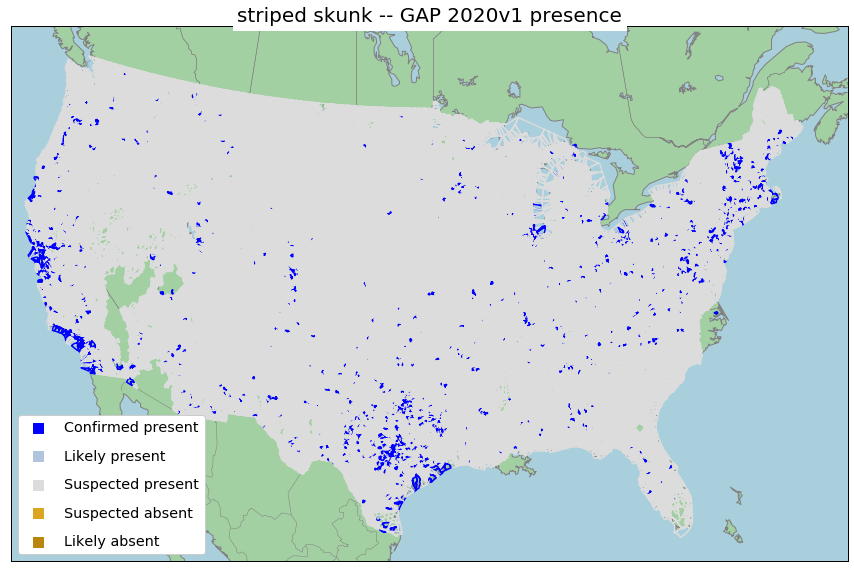

In [19]:
shp3 = {'file': '{0}{1}NB'.format(outDir, gap_id), 'column': 'presence', 'drawbounds': False,
        'alias': 'presence', 'column_colors': {1: 'b', 2: 'lightsteelblue', 3:'gainsboro', 4:'goldenrod', 5:'darkgoldenrod'}, 
        'value_alias': {1:'Confirmed present', 2:'Likely present', 3:'Suspected present', 4:'Suspected absent', 5:'Likely absent'}, 
        'marker': "s"}

title="{0} -- {1}".format(common_name, 'GAP 2020v1 presence')

try:
    functions.MapShapefilePolygons(map_these=[shp3], title=title)
except Exception as e:
    print(e)

### How many suitable records were available in the occurrence databases?

In [20]:
# Connect to the evaluation occurrence records database
cursor, connr = functions.spatialite(eval_db)

count = connr.execute("SELECT COUNT(occ_id) FROM evaluation_occurrences;").fetchone()[0]
print(str(count) + " occurence records were suitable for the spatial assessment.")

3938 occurence records were suitable for the spatial assessment.


### How many of the records were unusable because of their spatial attributes?

In [21]:
hucable = connr.execute("SELECT (SELECT COUNT(occ_id) FROM evaluation_occurrences) - (SELECT count(occ_id) FROM all_big_nuff);").fetchall()[0]
print(str(hucable[0]) + " records were unusable due to their spatial attributes.")

488 records were unusable due to their spatial attributes.


### How many HUCs that overlaped a *RECENT* record had insufficient evidence of occurrence?

In [22]:
containers = connr.execute("SELECT COUNT(DISTINCT HUC12RNG) FROM intersected_recent WHERE HUC12RNG NOT IN (SELECT HUC12RNG FROM big_nuff_recent);").fetchall()[0]
print(str(containers[0]) + " HUCs 'contained' insufficient portions of records for recent documentation of occurrence.")

540 HUCs 'contained' insufficient portions of records for recent documentation of occurrence.


### How many HUCs that overlaped a *HISTORICAL* record had insufficient evidence of occurrence?

In [23]:
containers = connr.execute("SELECT COUNT(DISTINCT HUC12RNG) FROM intersected_historical WHERE HUC12RNG NOT IN (SELECT HUC12RNG FROM big_nuff_historical);").fetchall()[0]
print(str(containers[0]) + " HUCs 'contained' insufficient portions of records for historical documentation of occurrence.")

261 HUCs 'contained' insufficient portions of records for historical documentation of occurrence.


### What was the maximum weight of *RECENT* evidence for occurrence within a single HUC?

In [24]:
maxi = connr.execute("SELECT MAX(recent_weight) FROM presence;").fetchall()[0]
print("The maximum recent weight of evidence for presence in a HUC was " + str(maxi[0]))

The maximum recent weight of evidence for presence in a HUC was 650


### What was the maximum weight of *HISTORICAL* evidence for occurrence within a single HUC?

In [25]:
maxi = connr.execute("SELECT MAX(historical_weight) FROM presence;").fetchall()[0]
print("The maximum historical weight of evidence for presence in a HUC was " + str(maxi[0]))

The maximum historical weight of evidence for presence in a HUC was 320


# Database Cleanup

In [26]:
#functions.cleanup_eval_db(eval_db)

# Timer

In [27]:
t2 = datetime.now()
print(t2 - t1)

3:09:36.840681
